# L6.a Graphs

## Example 1: Given the agjacency matrix, plot an undirected graph

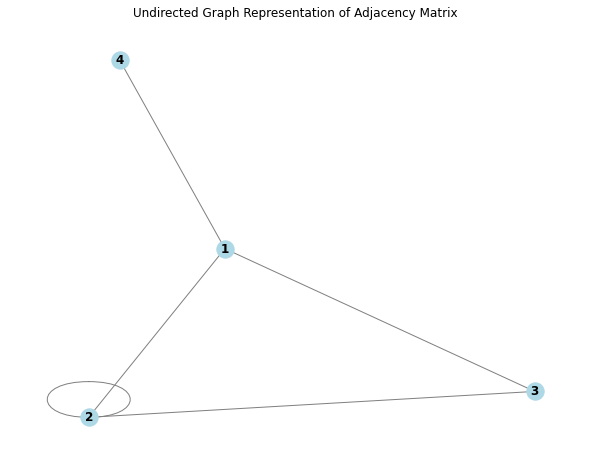

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Define the adjacency matrix
A = np.array([
    [0, 1, 1, 1],
    [1, 1, 1, 0],
    [1, 1, 0, 0],
    [1, 0, 0, 0]
])

# Define the labels for the nodes
labels = ['1', '2', '3', '4']

# Create an undirected graph from the adjacency matrix
G = nx.Graph()

# Add edges to the graph
n = len(A)
for i in range(n):
    for j in range(i, n):  # Use `range(i, n)` to avoid duplicate edges
        if A[i, j] > 0:  # There's an edge between node i and node j
            G.add_edge(labels[i], labels[j])

# Visualize the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Use spring layout for visualization
nx.draw(G, pos, with_labels=True, node_color='lightblue', font_weight='bold', edge_color='gray')
plt.title("Undirected Graph Representation of Adjacency Matrix")
plt.show()


## Example 2: Given the adjacency matrix, plot a directed graph

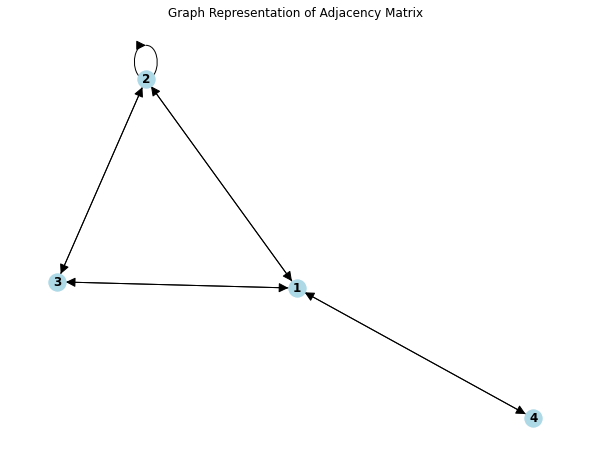

In [4]:
# Define the adjacency matrix
A = np.array([
    [0, 1, 1, 1],
    [1, 1, 1, 0],
    [1, 1, 0, 0],
    [1, 0, 0, 0]
])

# Define the labels for the nodes
labels = ['1', '2', '3', '4']

# Create a directed graph from the adjacency matrix
G = nx.DiGraph()

# Add edges to the graph
n = len(A)
for i in range(n):
    for j in range(n):
        if A[i, j] > 0:  # There's an edge from node i to node j
            G.add_edge(labels[i], labels[j])

# Visualize the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Use spring layout for visualization
nx.draw(G, pos, with_labels=True, node_color='lightblue', font_weight='bold', arrowsize=20)
plt.title("Graph Representation of Adjacency Matrix")
plt.show()


## Example 3: Adjacency matrix and a graph for the tournament

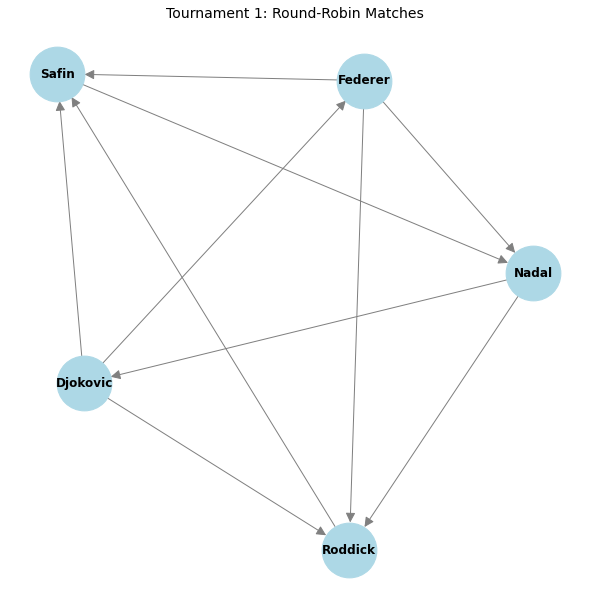

In [5]:
# Define the adjacency matrix for the tournament
adj_matrix = [
    [0, 1, 0, 1, 1],  # Djokovic
    [0, 0, 1, 1, 1],  # Federer
    [1, 0, 0, 1, 0],  # Nadal
    [0, 0, 0, 0, 1],  # Roddick
    [0, 0, 1, 0, 0],  # Safin
]

# List of players in alphabetical order
players = ["Djokovic", "Federer", "Nadal", "Roddick", "Safin"]

# Create a directed graph
G = nx.DiGraph()

# Add nodes
G.add_nodes_from(players)

# Add edges based on the adjacency matrix
for i in range(len(adj_matrix)):
    for j in range(len(adj_matrix[i])):
        if adj_matrix[i][j] == 1:
            G.add_edge(players[i], players[j])

# Define positions for better layout
pos = nx.spring_layout(G, seed=42)  # Fixed seed for consistent layout

# Draw the graph
plt.figure(figsize=(8, 8))
nx.draw(
    G, pos, with_labels=True, node_color='lightblue', font_weight='bold', 
    edge_color='gray', node_size=3000, arrowsize=20
)
plt.title("Tournament 1: Round-Robin Matches", fontsize=14)
plt.show()


## Example 4: Using the adjacency matrix, compute the rankings of players in Example 3 based on both direct and indirect wins

In [9]:
# Define the adjacency matrix
A = np.array([
    [0, 1, 0, 1, 1],  # Djokovic
    [0, 0, 1, 1, 1],  # Federer
    [1, 0, 0, 1, 0],  # Nadal
    [0, 0, 0, 0, 1],  # Roddick
    [0, 0, 1, 0, 0],  # Safin
])

# Players in alphabetical order
players = ["Djokovic", "Federer", "Nadal", "Roddick", "Safin"]

# Calculate the number of wins (row sums of A)
# NOTE: A.sum(axix=0) would compute the sum of each column in the adjacency matrix A
direct_wins = A.sum(axis=1)

# Calculate the square of the adjacency matrix
A2 = np.matmul(A, A)

# Calculate total wins and indirect wins (row sums of A + A^2)
total_matrix = A + A2
total_wins = total_matrix.sum(axis=1)


# Combine players and their rankings

# "zip" combines two lists (for example, "players"and "direct_wins") into pairs (for example ("Nadal",2))
# In "-x[1]", "x[1]" refers to the second element of the pair (i.e., the win count) 
# and "-" makes the sorting descending by negating the win count.

direct_ranking = sorted(zip(players, direct_wins), key=lambda x: -x[1])
total_ranking = sorted(zip(players, total_wins), key=lambda x: -x[1])

# Print results
print("Direct Wins Ranking:")
for rank, (player, wins) in enumerate(direct_ranking, start=1):
    print(f"{rank}. {player}: {wins} direct wins")

print("\nTotal Wins Ranking (Direct + Indirect):")
for rank, (player, wins) in enumerate(total_ranking, start=1):
    print(f"{rank}. {player}: {wins} total wins")


Direct Wins Ranking:
1. Djokovic: 3 direct wins
2. Federer: 3 direct wins
3. Nadal: 2 direct wins
4. Roddick: 1 direct wins
5. Safin: 1 direct wins

Total Wins Ranking (Direct + Indirect):
1. Djokovic: 8 total wins
2. Federer: 7 total wins
3. Nadal: 6 total wins
4. Safin: 3 total wins
5. Roddick: 2 total wins
